In [1]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
import os

#Prevent TensorFlow from taking up all of GPU memory
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
print(gpus)
warnings.simplefilter('ignore', UserWarning)

from util import *

[]


In [2]:
data_dim = 2
data_size = 1000

X2, X1, y2, y1, columns = generate_lipton(scale=True, num_pts=data_size)
name1 = 'women'
name2 = 'men'

In [3]:
lambda_l1 = 1e-4

D, G, combined = create_gan_small(data_dim, trans_loss_func=squared_l1_loss, trans_loss_wt=lambda_l1)
#train(D, G, combined, X1, X2, name1, name2, xlabel='work_exp', ylabel='hair_len', xlim=(-3,3), ylim=(-3,3), epochs=2000, batch_size=32)

In [4]:
#G.save_weights('lipton_midway')
G.load_weights('lipton_midway')

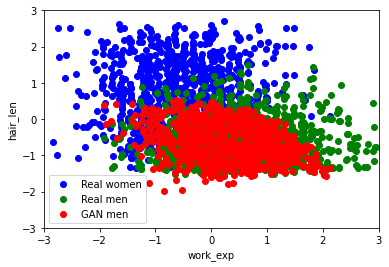

In [5]:
plot(X1, X2, G, name1, name2, num_pts_plot=data_size, xlabel='work_exp', ylabel='hair_len', xlim=(-3,3), ylim=(-3,3))

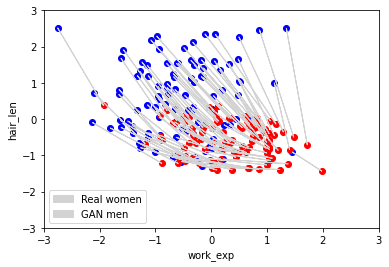

In [6]:
plot_changes(X1, G, name1, name2, xlabel='work_exp', ylabel='hair_len', xlim=(-3,3), ylim=(-3,3), num_pts_plot=100)

In [17]:
out1 = np.hstack([X1, np.zeros(X1.shape[0]).reshape(-1, 1)])
out2 = np.hstack([X2, np.ones(X2.shape[0]).reshape(-1, 1)])
outall = np.vstack([out1, out2])
data = pd.DataFrame(outall, columns=['work_exp', 'hair_len', 'gender'])

In [19]:
data['pred'] = model.predict(outall[:, :-1])

In [21]:
data.to_csv("lipton_data.data")

In [6]:
class Model:
    def predict(self, X):
        return np.dot(X, [1.4028, 1.1688]) > 0.8684

model = Model()

In [8]:
yhat1 = model.predict(X1)
yhat2 = model.predict(X2)
Xfake = G.predict(X1)
yhat_fake2 = model.predict(Xfake)
print(yhat1.sum(), yhat_fake2.sum())

291 144
